In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('steak.csv')
df

,descriptionID,steakID,manufactureDescription,maturity,Celcius,protein,calories,gluten free,exotic,sweet,...,chewy,soft,tough,moist,dry,thick,thin,grade,cost,steakID.1
0,1,1,Sirloin adalah potongan daging yang didapat da...,Rare,20°-35°,10,70,0,0,0,...,1,0,1,0,1,1,0,NaN,NaN,1
1,2,2,T-Bone adalah potongan daging T-Bone memiliki ...,Medium Rare,36°-50°,10,70,0,0,0,...,1,0,1,0,1,1,0,NaN,NaN,2
2,3,3,Striploin adalah potongan daging ini cukup dis...,Medium,51°-60°,10,70,0,0,0,...,1,0,1,0,0,0,0,NaN,NaN,3
3,4,4,Tinderloin adalah potongan daging sapi dari ba...,Medium Well,61°-70°,10,100,0,1,0,...,1,0,1,0,0,0,1,NaN,NaN,4
4,5,5,Ribeye: potongan daging yang menempel pada tul...,Well Done,70°-80°,10,90,1,0,0,...,1,1,0,1,0,1,0,NaN,NaN,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   descriptionID           5 non-null      int64  
 1   steakID                 5 non-null      int64  
 2   manufactureDescription  5 non-null      object 
 3   maturity                5 non-null      object 
 4   Celcius                 5 non-null      object 
 5   protein                 5 non-null      int64  
 6   calories                5 non-null      int64  
 7   gluten free             5 non-null      int64  
 8   exotic                  5 non-null      int64  
 9   sweet                   5 non-null      int64  
 10  hot                     5 non-null      int64  
 11  sweetSpicy              5 non-null      int64  
 12  teriyaki                5 non-null      int64  
 13  original                5 non-null      int64  
 14  Peppered                5 non-null      int64 

In [4]:
df.head()

,descriptionID,steakID,manufactureDescription,maturity,Celcius,protein,calories,gluten free,exotic,sweet,...,chewy,soft,tough,moist,dry,thick,thin,grade,cost,steakID.1
0,1,1,Sirloin adalah potongan daging yang didapat da...,Rare,20°-35°,10,70,0,0,0,...,1,0,1,0,1,1,0,NaN,NaN,1
1,2,2,T-Bone adalah potongan daging T-Bone memiliki ...,Medium Rare,36°-50°,10,70,0,0,0,...,1,0,1,0,1,1,0,NaN,NaN,2
2,3,3,Striploin adalah potongan daging ini cukup dis...,Medium,51°-60°,10,70,0,0,0,...,1,0,1,0,0,0,0,NaN,NaN,3
3,4,4,Tinderloin adalah potongan daging sapi dari ba...,Medium Well,61°-70°,10,100,0,1,0,...,1,0,1,0,0,0,1,NaN,NaN,4
4,5,5,Ribeye: potongan daging yang menempel pada tul...,Well Done,70°-80°,10,90,1,0,0,...,1,1,0,1,0,1,0,NaN,NaN,5


In [5]:
# data suhu
suhu = df['Celcius']
suhu

0    20°-35°
1    36°-50°
2    51°-60°
3    61°-70°
4    70°-80°
Name: Celcius, dtype: object

In [6]:
# Mengekstrak column celcius untuk dibuat data untuk suhu terendah, pertengahan dan tertinggi dan disimpan di dataframe baru
# dataframe baru hanya mengambil data yang dibutuhkan untuk training maturity, suhu, dan sodium
data_list = []
for i, d in enumerate(suhu):
    data1 = {
        'maturity': df.iloc[i]['maturity'],
        'suhu': int(d[0:2]),
        'calories': df.iloc[i]['calories'],
        'sodium': df.iloc[i]['sodium']
    }
    data_list.append(data1)
    data2 = {
        'maturity': df.iloc[i]['maturity'],
        'suhu': (int(d[0:2])+int(d[4:6]))//2,
        'calories': df.iloc[i]['calories'],
        'sodium': df.iloc[i]['sodium']
    }
    data_list.append(data2)
    data3 = {
        'maturity': df.iloc[i]['maturity'],
        'suhu': int(d[4:6]),
        'calories': df.iloc[i]['calories'],
        'sodium': df.iloc[i]['sodium']
    }
    data_list.append(data3)

ndf = pd.DataFrame(data_list)

In [7]:
ndf

,maturity,suhu,calories,sodium
0,Rare,20,70,570
1,Rare,27,70,570
2,Rare,35,70,570
3,Medium Rare,36,70,520
4,Medium Rare,43,70,520
5,Medium Rare,50,70,520
6,Medium,51,70,530
7,Medium,55,70,530
8,Medium,60,70,530
9,Medium Well,61,100,510


In [8]:
# convert maturity to categorical
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
ndf['maturity'] = label.fit_transform(ndf['maturity'])
ndf['maturity'] = ndf['maturity'].astype('category')

In [9]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   maturity  15 non-null     category
 1   suhu      15 non-null     int64   
 2   calories  15 non-null     int64   
 3   sodium    15 non-null     int64   
dtypes: category(1), int64(3)
memory usage: 715.0 bytes


In [10]:
# Pemisahan data untuk pelatihan
X = ndf.drop(columns=['maturity'])
y = ndf['maturity']

In [11]:
y

0     3
1     3
2     3
3     1
4     1
5     1
6     0
7     0
8     0
9     2
10    2
11    2
12    4
13    4
14    4
Name: maturity, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

In [12]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 5)

In [13]:
# Pembuatan model
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(6, input_dim=3, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [14]:
#compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Fit
model.fit(X, y, epochs=100, batch_size=3)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7534 - accuracy: 0.6667
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.8000
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.8000
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7333
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.8000
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.8000
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.8000
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.8667
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.8000
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.8000
Epoch 11/100
5/5 [===========

# Input

In [25]:
import matplotlib.pyplot as plt
import zipfile

image_dir = 'steak_img/'

#extract img
Zip = zipfile.ZipFile('steak.zip', 'r')
Zip.extractall(image_dir)
Zip.close()

label_image = {
    'Medium': 'medium.jpg', 
    'Medium Rare': 'mediumRare.jpg', 
    'Medium Well': 'mediumWell.jpg', 
    'Well Done': 'wellDone.jpg',
    'Rare': 'rare.jpg'
} 

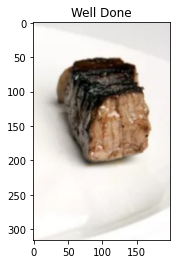

In [23]:
# input data
suhu = 74
calories = 90
sodium = 340
pred = model.predict(np.array([[suhu, calories, sodium]]))
for i, x in enumerate(pred[0]):
    if x == np.max(pred[0]):
        plt.title(label.classes_[i])
        img = plt.imread(image_dir+label_image[label.classes_[i]])
        plt.imshow(img)

In [18]:
label.classes_

array(['Medium', 'Medium Rare', 'Medium Well', 'Rare', 'Well Done'],
      dtype=object)